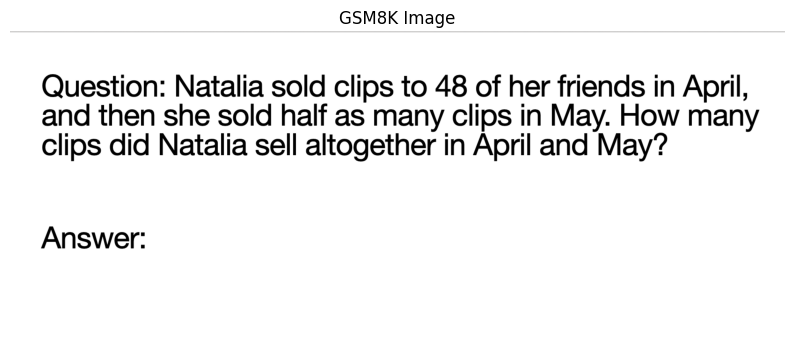

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Load the image
image = Image.open('gsm8k.png')

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.title('GSM8K Image')
plt.show()


In [7]:
# Get image resolution
width, height = image.size
print(f"Image resolution: {width} x {height} pixels")

Image resolution: 1656 x 636 pixels


In [9]:
from datasets import load_dataset
dataset = load_dataset("roneneldan/TinyStories", split="train", streaming=True)


font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.6
font_thickness = 1
cv2.getTextSize("Agasfafasdfadfaddfafda", font, font_scale, font_thickness)

((224, 14), 6)

In [23]:
# IterableDataset doesn't have len(), so we need to count manually
count = 0
dataset_iter = iter(dataset)
info_text = []
all_text = []
try:
    while True:
        example = next(dataset_iter)
        information = cv2.getTextSize(example["text"], font, font_scale, font_thickness)
        info_text.append(information)
        all_text.append(example["text"])        
        count += 1
        if count % 1000 == 0:  # Print progress every 1000 items
            print(f"Counted {count} items so far...")
except StopIteration:
    print(f"Total dataset length: {count}")

Counted 1000 items so far...
Counted 2000 items so far...
Counted 3000 items so far...
Counted 4000 items so far...
Counted 5000 items so far...
Counted 6000 items so far...
Counted 7000 items so far...
Counted 8000 items so far...
Counted 9000 items so far...
Counted 10000 items so far...
Counted 11000 items so far...
Counted 12000 items so far...
Counted 13000 items so far...
Counted 14000 items so far...
Counted 15000 items so far...
Counted 16000 items so far...
Counted 17000 items so far...
Counted 18000 items so far...
Counted 19000 items so far...
Counted 20000 items so far...
Counted 21000 items so far...
Counted 22000 items so far...
Counted 23000 items so far...
Counted 24000 items so far...
Counted 25000 items so far...
Counted 26000 items so far...
Counted 27000 items so far...
Counted 28000 items so far...
Counted 29000 items so far...
Counted 30000 items so far...
Counted 31000 items so far...
Counted 32000 items so far...
Counted 33000 items so far...
Counted 34000 items

In [25]:
pixel_info = [information[0][0] * information[0][1]for information in info_text]

In [32]:
import numpy as np
np.array(pixel_info).argmax()

np.int64(156291)

In [36]:
# all_text[156291]/
# Get indexes and values sorted by descending order
sorted_indices = np.argsort(pixel_info)[::-1]
sorted_values = np.array(pixel_info)[sorted_indices]

# Display the results
for i in range(min(100, len(sorted_indices))):  # Show top 10
    idx = sorted_indices[i]
    value = sorted_values[i]
    print(f"Index: {idx}, Value: {value}")

Index: 156291, Value: 783748
Index: 180140, Value: 678482
Index: 2093788, Value: 678482
Index: 906757, Value: 646688
Index: 208718, Value: 637392
Index: 1475600, Value: 635026
Index: 8179, Value: 630238
Index: 1802826, Value: 625702
Index: 462960, Value: 624820
Index: 908550, Value: 623168
Index: 1193533, Value: 620480
Index: 1738743, Value: 619878
Index: 96179, Value: 618996
Index: 538467, Value: 618828
Index: 362048, Value: 617750
Index: 972760, Value: 616798
Index: 1467769, Value: 615118
Index: 744361, Value: 609966
Index: 1737192, Value: 609406
Index: 1512026, Value: 609406
Index: 1951412, Value: 608104
Index: 546527, Value: 607656
Index: 424649, Value: 606718
Index: 2095071, Value: 606508
Index: 1882538, Value: 606396
Index: 725041, Value: 606186
Index: 271155, Value: 606102
Index: 678232, Value: 606102
Index: 538444, Value: 605528
Index: 1092399, Value: 605402
Index: 699816, Value: 605402
Index: 1769802, Value: 602896
Index: 1699604, Value: 600600
Index: 707941, Value: 599634
Ind

Reached max lines: 18


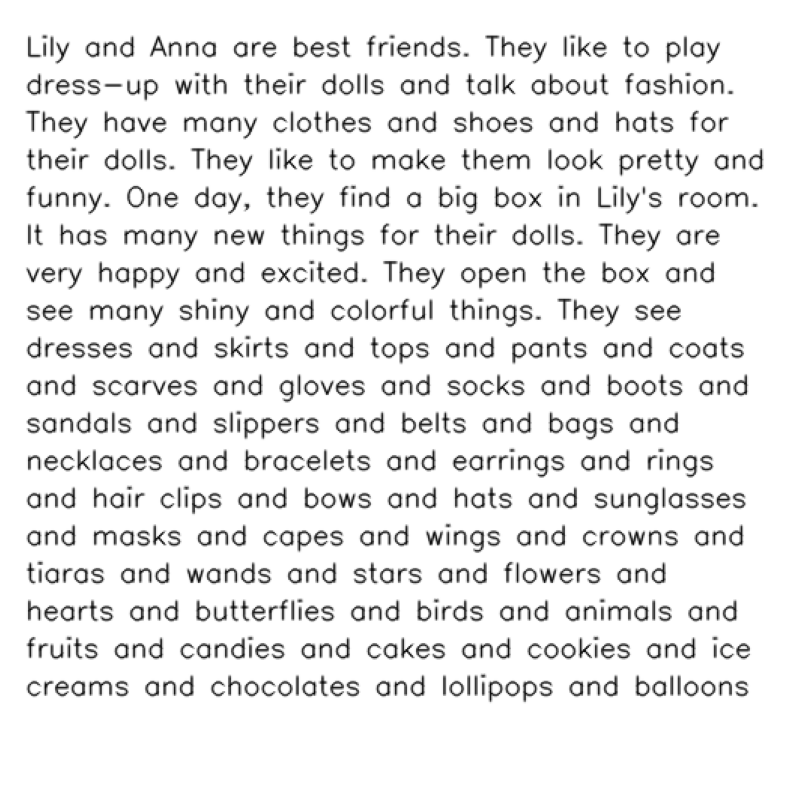

In [44]:
img = create_text_image(all_text[180140])
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [45]:
from datasets import load_dataset
import cv2
import numpy as np
import textwrap
import os

root_dir = "/data/user_data/mprabhud/tiny_story_dataset"
# Load TinyStories dataset
print("Loading TinyStories dataset...")
dataset = load_dataset("roneneldan/TinyStories", split="train", streaming=True)

# Create output directory
# os.makedirs("tinystories_images", exist_ok=True)

os.makedirs(f"{root_dir}/image_dataset", exist_ok=True)
os.makedirs(f"{root_dir}/text_dataset", exist_ok=True)

# Function to create image from text
def create_text_image(text, image_size=512, font_scale=0.6, font_thickness=1):
    # Create white background
    img = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255
    
    # Calculate text positioning
    font = cv2.FONT_HERSHEY_SIMPLEX
    margin = 10
    available_width = image_size - 2 * margin
    
    # Calculate line height and start position
    (text_width, text_height), baseline = cv2.getTextSize("Ag", font, font_scale, font_thickness)
    line_height = text_height + baseline + 5
    y_start = 30
    
    # Calculate maximum number of lines that can fit
    max_lines = (image_size - y_start - 30) // line_height
    
    # Wrap text based on actual pixel width
    words = text.split()
    lines = []
    current_line = []
    break_because_of_max_lines = False
    
    for word in words:
        # Test if adding this word fits
        test_line = ' '.join(current_line + [word])
        (line_width, _), _ = cv2.getTextSize(test_line, font, font_scale, font_thickness)
        
        if line_width <= available_width:
            current_line.append(word)
        else:
            if current_line:
                lines.append(' '.join(current_line))
                if len(lines) >= max_lines:
                    print(f"Reached max lines: {len(lines)}")
                    break_because_of_max_lines = True
                    break
            # Handle very long words that don't fit even alone
            if current_line == []:  # Word itself is too long
                (word_width, _), _ = cv2.getTextSize(word, font, font_scale, font_thickness)
                if word_width > available_width:
                    # Split long word (approximate)
                    chars_per_line = int(len(word) * available_width / word_width) or 1
                    for j in range(0, len(word), chars_per_line):
                        if len(lines) >= max_lines:
                            print(f"Reached max lines: {len(lines)}")    
                            break_because_of_max_lines = True
                            break
                        lines.append(word[j:j+chars_per_line])
                    continue
            current_line = [word]
    
    # Add remaining line if space
    if current_line and len(lines) < max_lines:
        lines.append(' '.join(current_line))
    
    if break_because_of_max_lines:
        return None
    
    # Draw text line by line
    for i, line in enumerate(lines):
        y_position = y_start + i * line_height
        cv2.putText(img, line, (margin, y_position), 
                   font, font_scale, (0, 0, 0), font_thickness, cv2.LINE_AA)
    
    return img

# Generate images from first 10 stories
print("Creating images from TinyStories...")
for i, story in enumerate(dataset):
    if i >= 10:  # Limit to first 10 stories
        break
    
    text = story['text']
    img = create_text_image(text)
    
    if img is not None:
        # Save image
        filename = f"{root_dir}/image_dataset/story_{i+1:08d}.png"
        cv2.imwrite(filename, img)
        with open(f"{root_dir}/text_dataset/story_{i+1:08d}.txt", "w") as f:
            f.write(text)
        print(f"Saved: {filename}")

# print("Done! Images saved in 'tinystories_images' directory")



Loading TinyStories dataset...
Creating images from TinyStories...
Saved: /data/user_data/mprabhud/tiny_story_dataset/image_dataset/story_00000001.png
Saved: /data/user_data/mprabhud/tiny_story_dataset/image_dataset/story_00000002.png
Saved: /data/user_data/mprabhud/tiny_story_dataset/image_dataset/story_00000003.png
Saved: /data/user_data/mprabhud/tiny_story_dataset/image_dataset/story_00000004.png
Saved: /data/user_data/mprabhud/tiny_story_dataset/image_dataset/story_00000005.png
Saved: /data/user_data/mprabhud/tiny_story_dataset/image_dataset/story_00000006.png
Saved: /data/user_data/mprabhud/tiny_story_dataset/image_dataset/story_00000007.png
Saved: /data/user_data/mprabhud/tiny_story_dataset/image_dataset/story_00000008.png
Saved: /data/user_data/mprabhud/tiny_story_dataset/image_dataset/story_00000009.png
Saved: /data/user_data/mprabhud/tiny_story_dataset/image_dataset/story_00000010.png


In [ ]:
from transformers import AutoModel, AutoTokenizer
import ipdb
st = ipdb.set_trace
import torch
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
model_name = 'deepseek-ai/DeepSeek-OCR'

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(model_name, _attn_implementation='flash_attention_2', trust_remote_code=True, use_safetensors=True)
model = model.eval().cuda().to(torch.bfloat16)


prompt = "<image>\n<|grounding|>Convert the document to markdown. "
image_file = '/home/mprabhud/phd_projects/continuous_diffusion/gsm8k.png'
output_path = 'out/'
# st()
res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 640, crop_mode=True, save_results = True, test_compress = True)

/data/user_data/mprabhud/mamba/envs/cont/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
You are attempting to use Flash Attention 2.0 without specifying a torch dtype. This might lead to unexpected behaviour
You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it

> /data/user_data/mprabhud/huggingface_cache/modules/transformers_modules/deepseek-ai/DeepSeek-OCR/2c968b433af61a059311cbf8997765023806a24d/modeling_deepseekocr.py(710)infer()
    709 
--> 710         os.makedirs(output_path, exist_ok=True)
    711         os.makedirs(f'{output_path}/images', exist_ok=True)

    [... skipping 21 hidden frame(s)]
  /tmp/ipykernel_370745/2636911572.py(18)<module>()
     16 output_path = 'out/'
     17 # st()
---> 18 res = model.infer(tokenizer, prompt=prompt, image_file=image_file, output_path = output_path, base_size = 1024, image_size = 640, crop_mode=True, save_results = True, test_compress = True)
> /data/user_data/mprabhud/huggingface_cache/modules/transformers_modules/deepseek-ai/DeepSeek-OCR/2c968b433af61a059311cbf8997765023806a24d/modeling_deepseekocr.py(710)infer()
    709 
--> 710         os.makedirs(output_path, exist_ok=True)
    711         os.makedirs(f'{output_path}/images', exist_ok=True)

    [... skipping 21 hidden frame(s)]
  /tmp/ipyk

/data/user_data/mprabhud/mamba/envs/cont/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_